In [1]:
import numpy as np
import pandas as pd
pd.__version__

'1.1.5'

In [2]:
rng = np.random.RandomState(42)
ser = pd.Series(rng.randint(0,10,4))
ser

0    6
1    3
2    7
3    4
dtype: int64

In [3]:
ser[ser < 4] = None
ser

0    6.0
1    NaN
2    7.0
3    4.0
dtype: float64

In [4]:
forward_fill = ser.fillna(method='ffill')
forward_fill

0    6.0
1    6.0
2    7.0
3    4.0
dtype: float64

In [5]:
backward_fill = ser.fillna(method='bfill')
backward_fill

0    6.0
1    7.0
2    7.0
3    4.0
dtype: float64

# Multiple Indexing

In [6]:
# Bad method
index = [('cali', 2000), ('cali', 2010), ('bogota', 2000), ('bogota', 2010)]
populations = rng.randint(1000, 1000000, 4)
pop = pd.Series(populations, index=index)
pop

(cali, 2000)       55886
(cali, 2010)      138337
(bogota, 2000)    522430
(bogota, 2010)    955698
dtype: int64

In [7]:
# Better method
index = pd.MultiIndex.from_tuples(index)
pop = pop.reindex(index)
pop

cali    2000     55886
        2010    138337
bogota  2000    522430
        2010    955698
dtype: int64

In [8]:
pop[:, 2010]

cali      138337
bogota    955698
dtype: int64

In [9]:
pop_df = pop.unstack()
pop_df

,2000,2010
bogota,522430,955698
cali,55886,138337


In [10]:
pop_new = pop_df.stack()
pop_new

bogota  2000    522430
        2010    955698
cali    2000     55886
        2010    138337
dtype: int64

# Pivot tables

In [11]:
import seaborn as sns
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [12]:
titanic.groupby(['sex', 'class'])['survived'].aggregate('mean').unstack()

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [13]:
titanic.pivot_table('survived', index='sex', columns='class')

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [14]:
age = pd.cut(titanic['age'], [0,18, 80])
titanic.pivot_table('survived', index=['sex', age], columns='class')

class               First    Second     Third
sex    age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

In [15]:
# qcut automatically compites quartiles
fare = pd.qcut(titanic['fare'], 2)
titanic.pivot_table('survived', ['sex', age], [fare, 'class'])

fare            (-0.001, 14.454]                     (14.454, 512.329]  \
class                      First    Second     Third             First   
sex    age                                                               
female (0, 18]               NaN  1.000000  0.714286          0.909091   
       (18, 80]              NaN  0.880000  0.444444          0.972973   
male   (0, 18]               NaN  0.000000  0.260870          0.800000   
       (18, 80]              0.0  0.098039  0.125000          0.391304   

fare                                 
class              Second     Third  
sex    age                           
female (0, 18]   1.000000  0.318182  
       (18, 80]  0.914286  0.391304  
male   (0, 18]   0.818182  0.178571  
       (18, 80]  0.030303  0.192308

In [16]:
titanic.pivot_table(index='sex', columns='class', aggfunc={'survived':sum, 'fare': 'mean'})

fare                       survived             
class        First     Second      Third    First Second Third
sex                                                           
female  106.125798  21.970121  16.118810       91     70    72
male     67.226127  19.741782  12.661633       45     17    47

In [19]:
from pandas_datareader import data
import yfinance as yfin

yfin.pdr_override()
goog = data.get_data_yahoo('GOOG', start='2021-10-24', end='2022-10-24')

TypeError: read_csv() got an unexpected keyword argument 'on_bad_lines'

In [24]:
!curl -o FremontBridge.csv https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 2816k    0 2816k    0     0   197k      0 --:--:--  0:00:14 --:--:--  360k


In [37]:
data = pd.read_csv('FremontBridge.csv', index_col='Date', parse_dates=True)

In [26]:
data.head()

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2012-10-03 00:00:00,13.0,4.0,9.0
2012-10-03 01:00:00,10.0,4.0,6.0
2012-10-03 02:00:00,2.0,1.0,1.0
2012-10-03 03:00:00,5.0,2.0,3.0
2012-10-03 04:00:00,7.0,6.0,1.0


In [27]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()

<AxesSubplot:xlabel='Date'>

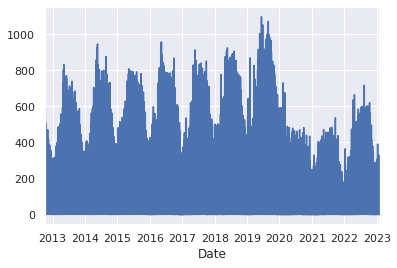

In [29]:
total = data['Fremont Bridge Total']
total.plot()

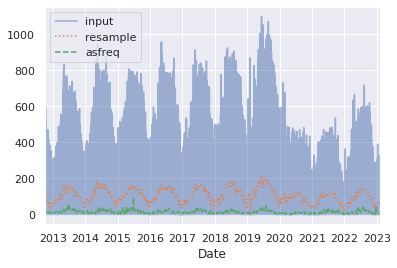

In [40]:
total.plot(alpha=0.5, style="-")
# Aggregator weekly
total.resample('W').mean().plot(style=":")
# Selector weekly
total.asfreq('W').plot(style="--")
plt.legend(['input', 'resample', 'asfreq'], loc='upper left')

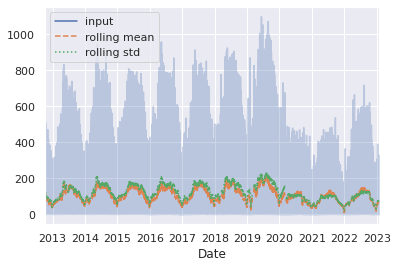

In [38]:
# Rolling means
rolling = total.rolling(365, center=True)
data_new = pd.DataFrame({
    'input': total,
    'rolling mean': rolling.mean(),
    'rolling std': rolling.std()
})
ax = data_new.plot(style=['-', '--', ':'])
ax.lines[0].set_alpha(0.3)

In [39]:
data.describe()

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
count,90538.000000,90538.000000,90538.000000
mean,105.941837,47.374892,58.566944
std,133.581904,60.933511,82.815485
min,0.000000,0.000000,0.000000
25%,13.000000,6.000000,7.000000
50%,59.000000,27.000000,30.000000
75%,142.000000,65.000000,75.000000
max,1097.000000,698.000000,850.000000


In [ ]:
# pd.eval() for dataframe o